# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [2]:
%pip install tqdm
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):
        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):
                inputs = X_train[i]
                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)
                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error**2
                # Actualizar los pesos y el sesgo
                self.weights += learning_rate * error * inputs * self.sigmoid_derivative(prediction)
                self.bias += learning_rate * error * self.sigmoid_derivative(prediction)
            
            train_error_by_epoch.append(train_error_acum / X_train.shape[0])

            # Evaluar en el conjunto de validación
            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                val_prediction = self.predict(X_validation[i])
                val_error = Y_validation[i] - val_prediction
                val_error_acum += val_error**2
            
            val_error_by_epoch.append(val_error_acum / X_validation.shape[0])

            # Visualización del progreso
            if epoch % 10 == 0:
                print(f'epoch: {epoch} | train error: {train_error_acum} | val error: {val_error_acum}')

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de entrenamiento por epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de validación por epoch')
        plt.show()


In [10]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000
N_inputs = 2
train_size = 0.833
N_validation = int((1 - train_size) * N_samples)

# Generar datos aleatorios
X_data = np.random.randint(0, 2, (N_samples, N_inputs))
Y_data = np.logical_and(X_data[:, 0], X_data[:, 1]).astype(int)

# Dividir en entrenamiento y validación
X_train, X_validation = X_data[:int(train_size * N_samples)], X_data[int(train_size * N_samples):]
Y_train, Y_validation = Y_data[:int(train_size * N_samples)], Y_data[int(train_size * N_samples):]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]]
Y_data (first 5 samples):
[1 0 0 0 1]


epoch: 0 | train error: 292.24677442486905 | val error: 19.15546680775634
epoch: 10 | train error: 1.4759150064304492 | val error: 0.27400057405414835
epoch: 20 | train error: 0.39188494066027424 | val error: 0.07589190010999501
epoch: 30 | train error: 0.1773398679116593 | val error: 0.034846297924460645
epoch: 40 | train error: 0.1005816126178331 | val error: 0.01990915882299873
epoch: 50 | train error: 0.06466966133234772 | val error: 0.012857380697588577
epoch: 60 | train error: 0.04503915138463755 | val error: 0.008980966319151584
epoch: 70 | train error: 0.03315440228475232 | val error: 0.006625064745594512
epoch: 80 | train error: 0.025419000166461727 | val error: 0.005087389098779713
epoch: 90 | train error: 0.020104759059529208 | val error: 0.004028750886150004


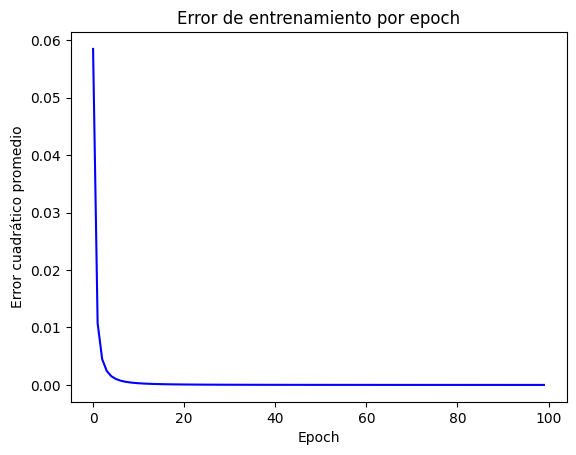

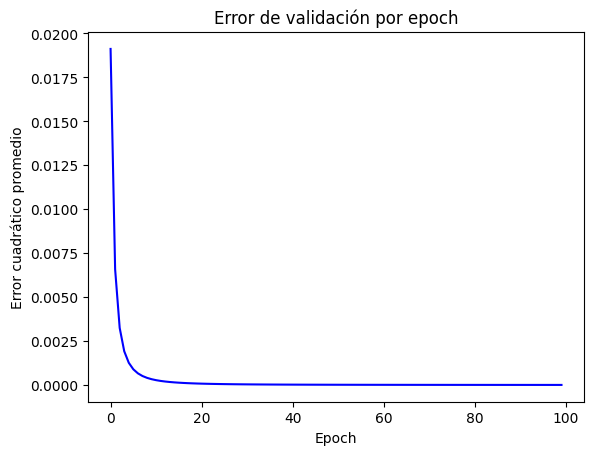

In [11]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [12]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 7.57066530905002e-09
Prediction: 0


In [14]:
# Obtener un overview de como funciona el modelo de forma aleatoria
predictions = []

## iterar por cada muestra de validación y generar la matriz de confusión
for sample in X_validation:
    prob = perceptron_and.predict(sample)
    predictions.append((prob > th).astype('int'))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[748   0]
 [  0 254]]


epoch: 0 | train error: 0.016297629995341078 | val error: 0.003269069771131322
epoch: 10 | train error: 0.013477397742634768 | val error: 0.002705554042688705
epoch: 20 | train error: 0.01133032888182133 | val error: 0.002276065553702875
epoch: 30 | train error: 0.009658109703781765 | val error: 0.001941250432028944
epoch: 40 | train error: 0.008330408389854427 | val error: 0.0016752036714384267
epoch: 50 | train error: 0.007258716306498623 | val error: 0.0014603091318260454
epoch: 60 | train error: 0.00638122044108247 | val error: 0.0012842495818077594
epoch: 70 | train error: 0.005653694367914865 | val error: 0.0011382032456802537
epoch: 80 | train error: 0.00504381916518968 | val error: 0.001015717780345596
epoch: 90 | train error: 0.004527533997305407 | val error: 0.0009119857584456294


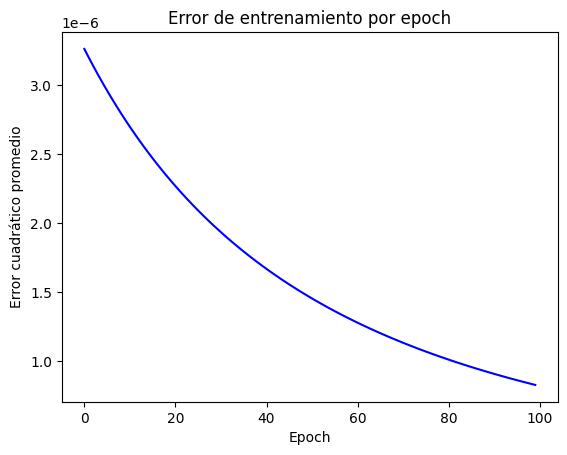

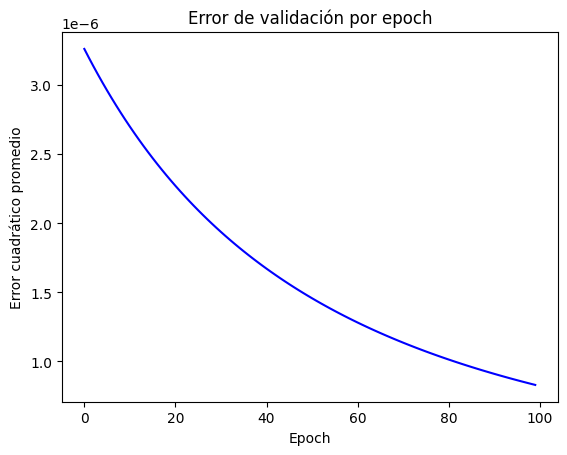

In [15]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [16]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 9.406981878708576e-10
Prediction: 0


In [19]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = []

## itera por cada muestra de validación y guardar las predicciones en una lista
for sample in X_validation:
    prob = perceptron_and.predict(sample)
    predictions.append((prob > 0.5).astype(int))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[748   0]
 [  0 254]]


In [20]:
# Evaluamos cómo funciona el modelo en el set de test
test_predictions = []

## Generar el set de test (de forma similar al de validación)
N_test = 500
X_test = np.random.randint(0, 2, (N_test, N_inputs))
Y_test = np.logical_and(X_test[:, 0], X_test[:, 1]).astype(int)

## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
for sample in X_test:
    prob = perceptron_and.predict(sample)
    test_predictions.append((prob > 0.5).astype(int))

## Calcula la matriz de confusión
test_conf_matrix = confusion_matrix(Y_test, test_predictions)

## Visualiza la matriz de confusión
print("Matriz de Confusión (Test):")
print(test_conf_matrix)

Matriz de Confusión (Test):
[[377   0]
 [  0 123]]
